In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

<Axes: xlabel='x', ylabel='y'>

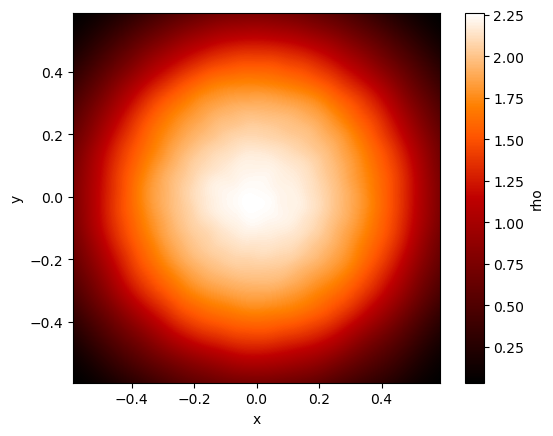

In [2]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
sdf.params={'mass':2.0/100}
sdf.render('rho', xsec=1.0)

In [3]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [4]:
T = 48
time = range(0, T)
ang_mom = np.zeros(T)

fig = plt.figure()

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/toy_star/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    plt.clf()
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))
plt.show()

<Figure size 640x480 with 0 Axes>

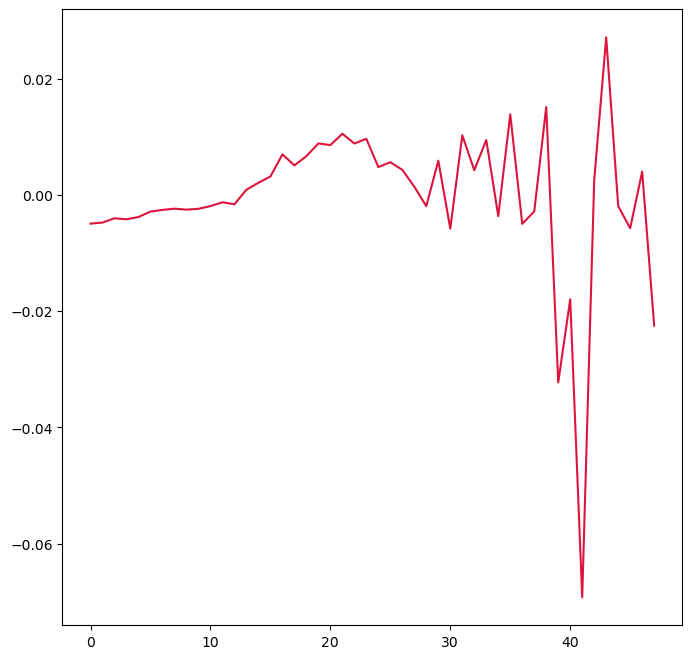

In [5]:
fig = plt.figure(figsize=(8,8))
plt.plot(time, ang_mom, '-', color='crimson')
plt.show()